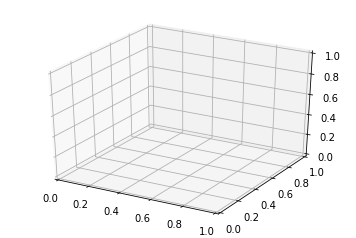

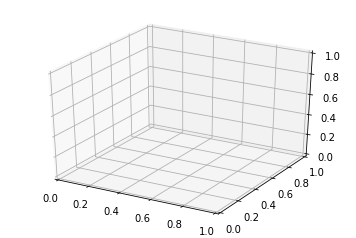

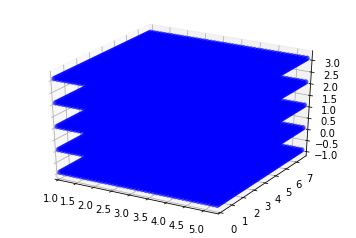

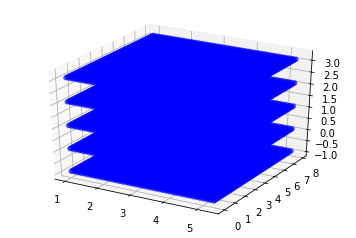

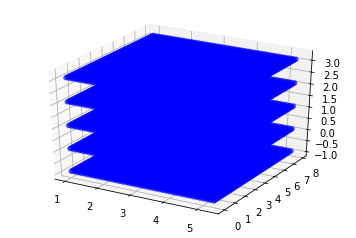

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

n_neighbors = 15
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,1:4]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0GFF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights,n_jobs = 6)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h), (np.arange(z_min, z_max)))
    q = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

    # Put the result into a color plot
    q = q.reshape(xx.shape)
    #plt.figure()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plt.pcolormesh(xx, yy, zz, q, cmap=cmap_light, shading = 'gouraud',edgecolor='face') 

    # Plot also the training points
    ax.scatter(xx, yy, zz, cmap = cmap_bold,color='blue', alpha=0.5)
    #plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y, cmap=cmap_bold)
''' plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.zlim(zz.min(), zz.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
'''
plt.show()